In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii, fits
from astropy.modeling import fitting, FittableModel, Fittable2DModel, Fittable1DModel, Parameter, custom_model
from lmfit import minimize, Minimizer, report_fit, Model, Parameters
import lmfit
import pandas as pd
from MUSE_Models import MUSE_3D_OIII, MUSE_3D_residual, Moffat2D_OIII

In [4]:
data = ascii.read("FCC167_data/PSF/FCC170_star.txt", names=["x","y","flux"])
x = data["x"][:30]
y = data["y"][::30]
flux = data["flux"]

x_y_size = 30
# Area of Interest coordinates setup: meshgrid for plotting, x_fit and y_fit for fitting 30x30 grid.
X_AOI, Y_AOI = np.mgrid[:x_y_size,:x_y_size]

coordinates = [(n,m) for n in range(x_y_size) for m in range(x_y_size)]

x_fit = [item[0] for item in coordinates]
y_fit = [item[1] for item in coordinates]

In [54]:
moff_init = Moffat2D_OIII(amplitude=10000., x_0=15., y_0=15., gamma=1.0, alpha=1.0, bkg=0., fixed={"alpha":False,"bkg":True})
fitter = fitting.LevMarLSQFitter()
m_fit = fitter(moff_init, x_fit, y_fit, flux, maxiter=1000000)

In [55]:
print(m_fit.gamma)
print(m_fit.alpha)

Parameter('gamma', value=3.371932108488933)
Parameter('alpha', value=2.616149222581531)


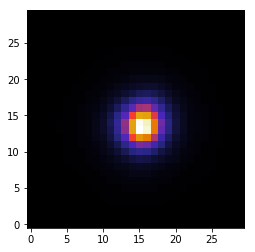

In [56]:
plt.imshow(flux.reshape(30,30), origin="lower", cmap="CMRmap")

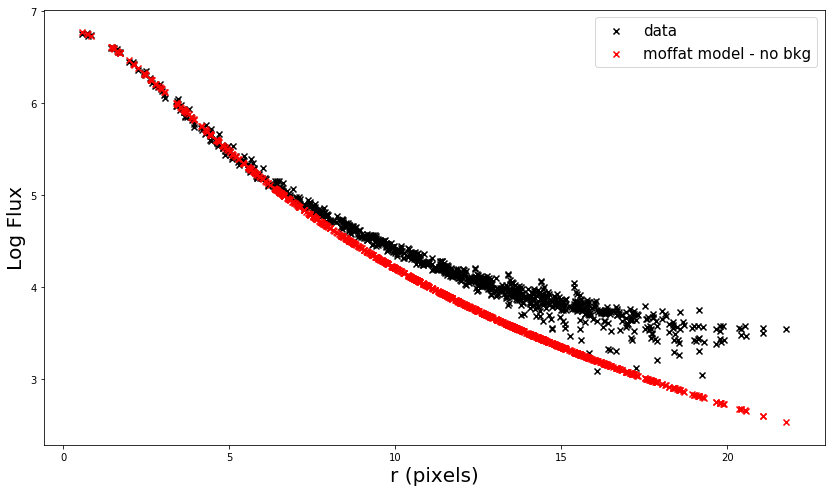

In [57]:
x_c_m = m_fit.x_0.value
y_c_m = m_fit.y_0.value
r_moff = np.sqrt((x_fit - x_c_m)**2 + (y_fit - y_c_m)**2)

plt.figure(figsize=(14,8))
plt.scatter(r_moff, np.log10(flux), marker="x", c="k", label="data")
plt.scatter(r_moff, np.log10(m_fit(x_fit, y_fit)), marker= "x", c="r", label="moffat model - no bkg")
#plt.axhline(y=np.log10(m_fit.bkg.value), label="background")
plt.legend(fontsize=15)
plt.xlabel("r (pixels)",fontsize=20)
plt.ylabel("Log Flux", fontsize=20)
#plt.savefig("Plots/PSF testing bkg.png")
plt.show()

In [30]:
m_fit.gamma.value

3.2608862346839516

In [ ]:
np.sum(flux)

In [ ]:
np.sum(m_fit(x_fit,y_fit))

In [58]:
np.sum(m_fit(x_fit,y_fit))/ np.sum(flux)

0.96607387708828729

In [ ]:
#1.0000000000016398    - 4.765

#0.99999998994040284   - Free